In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from math import e
from joblib import dump, load
import statistics as st
from calendar import isleap
from numpy import loadtxt

In [2]:
# Read Orography
OroData = xr.open_dataset('../../Data/eraDown/ERA5_2degree_Down/DailyMean/ERA5IGP_Orography.nc')
OroD = OroData.sel(latitude=slice(32,24),longitude=slice(74,86))
# create mask
oro = OroD.z
oro.values = OroD.z.values/9.81
oro.attrs
oro.attrs['units']='meter'
oro.attrs['long_name']='Orography'
oro.values[oro.values>500.1]=np.NaN
mask=oro.values/oro.values

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


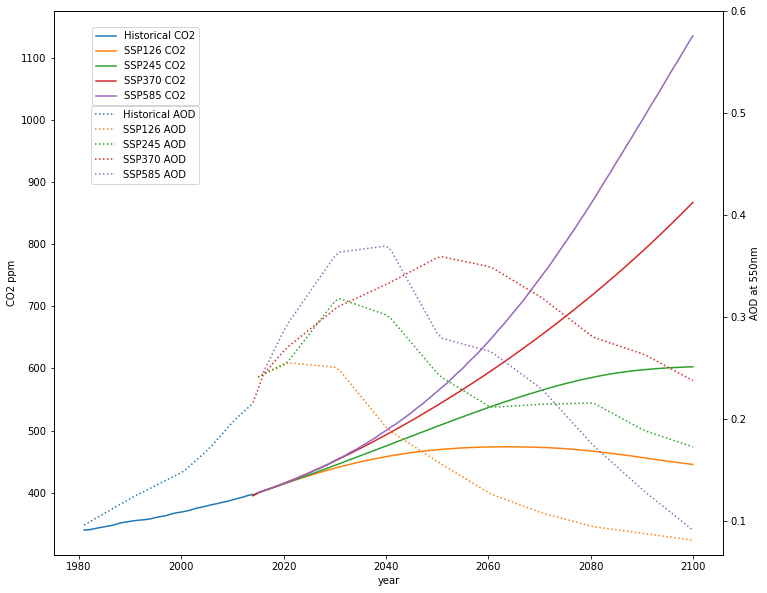

In [3]:
fig,ax1 = plt.subplots(figsize=(12, 10))
ax2 = ax1.twinx()

# Historical
histYears=loadtxt('../../Data/CMIP6GHGData/co2historical_1850_2014_glob.txt',usecols=0,skiprows=131)
histCo2=loadtxt('../../Data/CMIP6GHGData/co2historical_1850_2014_glob.txt',usecols=1,skiprows=131)
#print(years)
#print(co2)
ax1.plot(histYears, histCo2, label='Historical CO2',linestyle='solid',color=u'#1f77b4')


AODData = xr.open_dataset('../../Data/CMIP6AerosolData/RegridNHanthrop_iitmesm_1850_2015_historig_AOD550nm.nc')
AODData.time
histAOD=AODData.sel(latitude=slice(32,24),longitude=slice(74,86)).aod_band10
histAOD.values=histAOD.values*mask
t1=pd.to_datetime(histAOD.time, format='%Y%m%d')
histAOD['time']=t1
# Area Average
aodTS1=histAOD.mean(dim=['latitude','longitude'], skipna=True)
aodTs=(aodTS1[((aodTS1.time.dt.month>11) | (aodTS1.time.dt.month<2)) ].sel(time=slice('1980-12-1','2016-1-31')))
x=np.arange(1981,2017)
histAODTs=[]
for yr in (histYears) :
    InDString=np.datetime64(str(int(yr)-1)+'-12-01T00:00:00')
    EnDString=np.datetime64(str(int(yr))+'-01-31T00:00:00')
   # print(EnDString)
    aodT=aodTs.sel(time=slice(InDString,EnDString))
    histAODTs.append(aodT.mean())

ax2.plot(histYears, histAODTs, label='Historical AOD',color=u'#1f77b4',linestyle=':')



# SSP126
ssp126Years=loadtxt('../../Data/CMIP6GHGData/co2historicaldata_glob_sc126.txt',usecols=0,skiprows=1,max_rows=87)
ssp126Co2=loadtxt('../../Data/CMIP6GHGData/co2historicaldata_glob_sc126.txt',usecols=1,skiprows=1,max_rows=87)
#print(ssp126Co2[::-1])
#print(ssp126Years[::-1])
#plt.plot(ssp126Years[::-1],ssp126Co2[::-1],label='SSP126')
ax1.plot(ssp126Years[::-1], ssp126Co2[::-1], label='SSP126 CO2',linestyle='solid',color=u'#ff7f0e')

AODData = xr.open_dataset('../../Data/CMIP6AerosolData/RegridNHDecJan_anthrop_iitmesm_2014_2100_126_AOD550nm.nc')
AODData.time
histAOD=AODData.sel(latitude=slice(32,24),longitude=slice(74,86)).aod_band10
histAOD.values=histAOD.values*mask
t1=pd.to_datetime(histAOD.time, format='%Y%m%d')
histAOD['time']=t1
# Area Average
aodTS1=histAOD.mean(dim=['latitude','longitude'], skipna=True)
aodTs=(aodTS1[((aodTS1.time.dt.month>11) | (aodTS1.time.dt.month<2)) ])
x=np.arange(2014,2101)
histAODTs=[]
for yr in x :
    InDString=np.datetime64(str(yr-1)+'-12-01T00:00:00')
    EnDString=np.datetime64(str(yr)+'-01-31T00:00:00')
   # print(EnDString)
    aodT=aodTs.sel(time=slice(InDString,EnDString))
    histAODTs.append(aodT.mean())

ax2.plot(ssp126Years[::-1], histAODTs, label='SSP126 AOD',color=u'#ff7f0e',linestyle=':')

# SSP245
ssp245Years=loadtxt('../../Data/CMIP6GHGData/co2historicaldata_glob_sc245.txt',usecols=0,skiprows=1,max_rows=87)
ssp245Co2=loadtxt('../../Data/CMIP6GHGData/co2historicaldata_glob_sc245.txt',usecols=1,skiprows=1,max_rows=87)
#print(ssp245Co2[::-1])
#print(ssp245Years[::-1])
ax1.plot(ssp245Years[::-1], ssp245Co2[::-1], label='SSP245 CO2',linestyle='solid',color=u'#2ca02c')

AODData = xr.open_dataset('../../Data/CMIP6AerosolData/RegridNHDecJan_anthrop_iitmesm_2014_2100_245_AOD550nm.nc')
AODData.time
histAOD=AODData.sel(latitude=slice(32,24),longitude=slice(74,86)).aod_band10
histAOD.values=histAOD.values*mask
t1=pd.to_datetime(histAOD.time, format='%Y%m%d')
histAOD['time']=t1
# Area Average
aodTS1=histAOD.mean(dim=['latitude','longitude'], skipna=True)
aodTs=(aodTS1[((aodTS1.time.dt.month>11) | (aodTS1.time.dt.month<2)) ])
x=np.arange(2014,2101)
histAODTs=[]
for yr in x :
    InDString=np.datetime64(str(yr-1)+'-12-01T00:00:00')
    EnDString=np.datetime64(str(yr)+'-01-31T00:00:00')
   # print(EnDString)
    aodT=aodTs.sel(time=slice(InDString,EnDString))
    histAODTs.append(aodT.mean())

ax2.plot(ssp245Years[::-1], histAODTs, label='SSP245 AOD',color=u'#2ca02c',linestyle=':')


# SSP370
ssp370Years=loadtxt('../../Data/CMIP6GHGData/co2historicaldata_glob_sc370.txt',usecols=0,skiprows=1,max_rows=87)
ssp370Co2=loadtxt('../../Data/CMIP6GHGData/co2historicaldata_glob_sc370.txt',usecols=1,skiprows=1,max_rows=87)
#print(ssp370Co2[::-1])
#print(ssp370Years[::-1])
ax1.plot(ssp370Years[::-1], ssp370Co2[::-1], label='SSP370 CO2',linestyle='solid',color=u'#d62728')

AODData = xr.open_dataset('../../Data/CMIP6AerosolData/RegridNHDecJan_anthrop_iitmesm_2014_2100_370_AOD550nm.nc')
AODData.time
histAOD=AODData.sel(latitude=slice(32,24),longitude=slice(74,86)).aod_band10
histAOD.values=histAOD.values*mask
t1=pd.to_datetime(histAOD.time, format='%Y%m%d')
histAOD['time']=t1
# Area Average
aodTS1=histAOD.mean(dim=['latitude','longitude'], skipna=True)
aodTs=(aodTS1[((aodTS1.time.dt.month>11) | (aodTS1.time.dt.month<2)) ])
x=np.arange(2014,2101)
histAODTs=[]
for yr in x :
    InDString=np.datetime64(str(yr-1)+'-12-01T00:00:00')
    EnDString=np.datetime64(str(yr)+'-01-31T00:00:00')
   # print(EnDString)
    aodT=aodTs.sel(time=slice(InDString,EnDString))
    histAODTs.append(aodT.mean())

ax2.plot(ssp370Years[::-1], histAODTs, label='SSP370 AOD',color=u'#d62728',linestyle=':')


# SSP585
ssp585Years=loadtxt('../../Data/CMIP6GHGData/co2historicaldata_glob_sc585.txt',usecols=0,skiprows=1,max_rows=86)
ssp585Co2=loadtxt('../../Data/CMIP6GHGData/co2historicaldata_glob_sc585.txt',usecols=1,skiprows=1,max_rows=86)
#print(ssp585Co2[::-1])
#print(ssp585Years[::-1])
ax1.plot(ssp585Years[::-1], ssp585Co2[::-1], label='SSP585 CO2',linestyle='solid',color=u'#9467bd')

AODData = xr.open_dataset('../../Data/CMIP6AerosolData/RegridNHDecJan_anthrop_iitmesm_2014_2100_585_AOD550nm.nc')
AODData.time
histAOD=AODData.sel(latitude=slice(32,24),longitude=slice(74,86)).aod_band10
histAOD.values=histAOD.values*mask
t1=pd.to_datetime(histAOD.time, format='%Y%m%d')
histAOD['time']=t1
# Area Average
aodTS1=histAOD.mean(dim=['latitude','longitude'], skipna=True)
aodTs=(aodTS1[((aodTS1.time.dt.month>11) | (aodTS1.time.dt.month<2)) ])
x=np.arange(2016,2101)
histAODTs=[]
for yr in x :
    InDString=np.datetime64(str(yr-1)+'-12-01T00:00:00')
    EnDString=np.datetime64(str(yr)+'-01-31T00:00:00')
   # print(EnDString)
    aodT=aodTs.sel(time=slice(InDString,EnDString))
    histAODTs.append(aodT.mean())

ax2.plot(x, histAODTs, label='SSP585 AOD',color=u'#9467bd',linestyle=':')



ax1.set_xlabel('year')
ax1.set_ylabel('CO2 ppm')
ax2.set_ylabel('AOD at 550nm')
ax2.set_ylim(top=0.6)
ax1.legend(loc='upper left', bbox_to_anchor=(0.05, 0.98))
ax2.legend(loc='upper right', bbox_to_anchor=(0.225, 0.835))
plt.savefig('AOD_CO2_ts_0.6.eps')
plt.show()
  


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


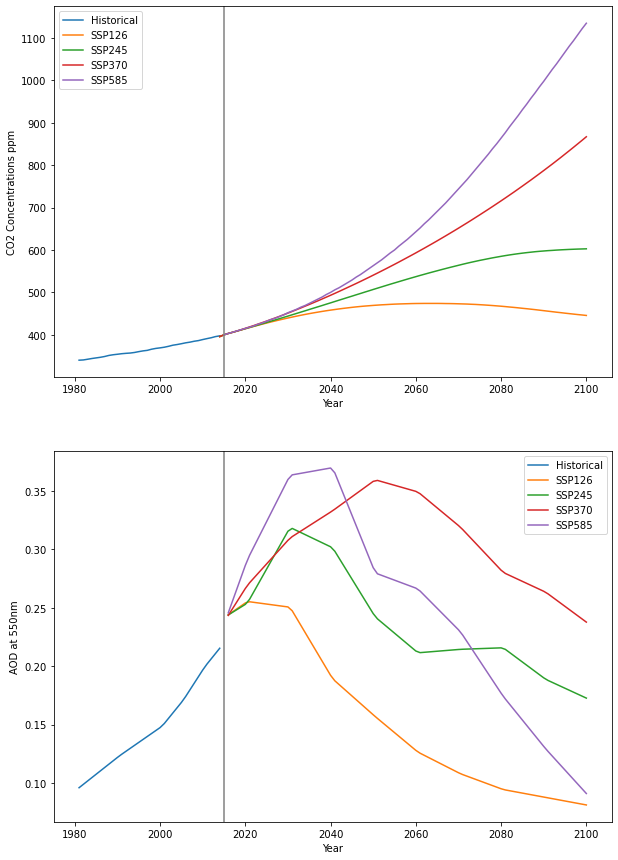

In [22]:
fig = plt.subplots(figsize=(10, 15))
#ax2 = ax1.twinx()

# Historical
histYears=loadtxt('../../Data/CMIP6GHGData/co2historical_1850_2014_glob.txt',usecols=0,skiprows=131)
histCo2=loadtxt('../../Data/CMIP6GHGData/co2historical_1850_2014_glob.txt',usecols=1,skiprows=131)
#print(years)
#print(co2)
plt.subplot(2, 1, 1)
plt.plot(histYears, histCo2, label='Historical',linestyle='solid',color=u'#1f77b4')
# SSP126
ssp126Years=loadtxt('../../Data/CMIP6GHGData/co2historicaldata_glob_sc126.txt',usecols=0,skiprows=1,max_rows=87)
ssp126Co2=loadtxt('../../Data/CMIP6GHGData/co2historicaldata_glob_sc126.txt',usecols=1,skiprows=1,max_rows=87)
#print(ssp126Co2[::-1])
#print(ssp126Years[::-1])
#plt.plot(ssp126Years[::-1],ssp126Co2[::-1],label='SSP126')
plt.plot(ssp126Years[::-1], ssp126Co2[::-1], label='SSP126',linestyle='solid',color=u'#ff7f0e')

# SSP245
ssp245Years=loadtxt('../../Data/CMIP6GHGData/co2historicaldata_glob_sc245.txt',usecols=0,skiprows=1,max_rows=87)
ssp245Co2=loadtxt('../../Data/CMIP6GHGData/co2historicaldata_glob_sc245.txt',usecols=1,skiprows=1,max_rows=87)
#print(ssp245Co2[::-1])
#print(ssp245Years[::-1])
plt.plot(ssp245Years[::-1], ssp245Co2[::-1], label='SSP245',linestyle='solid',color=u'#2ca02c')




# SSP370
ssp370Years=loadtxt('../../Data/CMIP6GHGData/co2historicaldata_glob_sc370.txt',usecols=0,skiprows=1,max_rows=87)
ssp370Co2=loadtxt('../../Data/CMIP6GHGData/co2historicaldata_glob_sc370.txt',usecols=1,skiprows=1,max_rows=87)
#print(ssp370Co2[::-1])
#print(ssp370Years[::-1])
plt.plot(ssp370Years[::-1], ssp370Co2[::-1], label='SSP370',linestyle='solid',color=u'#d62728')

# SSP585
ssp585Years=loadtxt('../../Data/CMIP6GHGData/co2historicaldata_glob_sc585.txt',usecols=0,skiprows=1,max_rows=86)
ssp585Co2=loadtxt('../../Data/CMIP6GHGData/co2historicaldata_glob_sc585.txt',usecols=1,skiprows=1,max_rows=86)
#print(ssp585Co2[::-1])
#print(ssp585Years[::-1])
plt.plot(ssp585Years[::-1], ssp585Co2[::-1], label='SSP585',linestyle='solid',color=u'#9467bd')
plt.axvline(x=2015,color='grey')
plt.legend()
plt.xlabel('Year') 
plt.ylabel('CO2 Concentrations ppm')

plt.subplot(2, 1, 2)

AODData = xr.open_dataset('../../Data/CMIP6AerosolData/RegridNHanthrop_iitmesm_1850_2015_historig_AOD550nm.nc')
AODData.time
histAOD=AODData.sel(latitude=slice(32,24),longitude=slice(74,86)).aod_band10
histAOD.values=histAOD.values*mask
t1=pd.to_datetime(histAOD.time, format='%Y%m%d')
histAOD['time']=t1
# Area Average
aodTS1=histAOD.mean(dim=['latitude','longitude'], skipna=True)
aodTs=(aodTS1[((aodTS1.time.dt.month>11) | (aodTS1.time.dt.month<2)) ].sel(time=slice('1980-12-1','2016-1-31')))
x=np.arange(1981,2017)
histAODTs=[]
for yr in (histYears) :
    InDString=np.datetime64(str(int(yr)-1)+'-12-01T00:00:00')
    EnDString=np.datetime64(str(int(yr))+'-01-31T00:00:00')
   # print(EnDString)
    aodT=aodTs.sel(time=slice(InDString,EnDString))
    histAODTs.append(aodT.mean())

plt.plot(histYears, histAODTs, label='Historical',color=u'#1f77b4')

AODData = xr.open_dataset('../../Data/CMIP6AerosolData/RegridNHDecJan_anthrop_iitmesm_2014_2100_126_AOD550nm.nc')
AODData.time
histAOD=AODData.sel(latitude=slice(32,24),longitude=slice(74,86)).aod_band10
histAOD.values=histAOD.values*mask
t1=pd.to_datetime(histAOD.time, format='%Y%m%d')
histAOD['time']=t1
# Area Average
aodTS1=histAOD.mean(dim=['latitude','longitude'], skipna=True)
aodTs=(aodTS1[((aodTS1.time.dt.month>11) | (aodTS1.time.dt.month<2)) ])
x=np.arange(2016,2101)
histAODTs=[]
for yr in x :
    InDString=np.datetime64(str(yr-1)+'-12-01T00:00:00')
    EnDString=np.datetime64(str(yr)+'-01-31T00:00:00')
   # print(EnDString)
    aodT=aodTs.sel(time=slice(InDString,EnDString))
    histAODTs.append(aodT.mean())

plt.plot(x, histAODTs, label='SSP126',color=u'#ff7f0e')



AODData = xr.open_dataset('../../Data/CMIP6AerosolData/RegridNHDecJan_anthrop_iitmesm_2014_2100_245_AOD550nm.nc')
AODData.time
histAOD=AODData.sel(latitude=slice(32,24),longitude=slice(74,86)).aod_band10
histAOD.values=histAOD.values*mask
t1=pd.to_datetime(histAOD.time, format='%Y%m%d')
histAOD['time']=t1
# Area Average
aodTS1=histAOD.mean(dim=['latitude','longitude'], skipna=True)
aodTs=(aodTS1[((aodTS1.time.dt.month>11) | (aodTS1.time.dt.month<2)) ])
x=np.arange(2016,2101)
histAODTs=[]
for yr in x :
    InDString=np.datetime64(str(yr-1)+'-12-01T00:00:00')
    EnDString=np.datetime64(str(yr)+'-01-31T00:00:00')
   # print(EnDString)
    aodT=aodTs.sel(time=slice(InDString,EnDString))
    histAODTs.append(aodT.mean())

plt.plot(x, histAODTs, label='SSP245',color=u'#2ca02c')




AODData = xr.open_dataset('../../Data/CMIP6AerosolData/RegridNHDecJan_anthrop_iitmesm_2014_2100_370_AOD550nm.nc')
AODData.time
histAOD=AODData.sel(latitude=slice(32,24),longitude=slice(74,86)).aod_band10
histAOD.values=histAOD.values*mask
t1=pd.to_datetime(histAOD.time, format='%Y%m%d')
histAOD['time']=t1
# Area Average
aodTS1=histAOD.mean(dim=['latitude','longitude'], skipna=True)
aodTs=(aodTS1[((aodTS1.time.dt.month>11) | (aodTS1.time.dt.month<2)) ])
x=np.arange(2016,2101)
histAODTs=[]
for yr in x :
    InDString=np.datetime64(str(yr-1)+'-12-01T00:00:00')
    EnDString=np.datetime64(str(yr)+'-01-31T00:00:00')
   # print(EnDString)
    aodT=aodTs.sel(time=slice(InDString,EnDString))
    histAODTs.append(aodT.mean())

plt.plot(x, histAODTs, label='SSP370',color=u'#d62728')




AODData = xr.open_dataset('../../Data/CMIP6AerosolData/RegridNHDecJan_anthrop_iitmesm_2014_2100_585_AOD550nm.nc')
AODData.time
histAOD=AODData.sel(latitude=slice(32,24),longitude=slice(74,86)).aod_band10
histAOD.values=histAOD.values*mask
t1=pd.to_datetime(histAOD.time, format='%Y%m%d')
histAOD['time']=t1
# Area Average
aodTS1=histAOD.mean(dim=['latitude','longitude'], skipna=True)
aodTs=(aodTS1[((aodTS1.time.dt.month>11) | (aodTS1.time.dt.month<2)) ])
x=np.arange(2016,2101)
histAODTs=[]
for yr in x :
    InDString=np.datetime64(str(yr-1)+'-12-01T00:00:00')
    EnDString=np.datetime64(str(yr)+'-01-31T00:00:00')
   # print(EnDString)
    aodT=aodTs.sel(time=slice(InDString,EnDString))
    histAODTs.append(aodT.mean())

plt.plot(x, histAODTs, label='SSP585',color=u'#9467bd')
plt.axvline(x=2015,color='grey')

plt.legend()
plt.xlabel('Year') 
plt.ylabel('AOD at 550nm')

#ax1.set_xlabel('year')
#ax1.set_ylabel('CO2 ppm')
#ax2.set_ylabel('AOD at 550nm')
#ax2.set_ylim(top=0.6)
#ax1.legend(loc='upper left', bbox_to_anchor=(0.05, 0.98))
#ax2.legend(loc='upper right', bbox_to_anchor=(0.225, 0.835))
#plt.savefig('AOD_CO2_ts_0.6.eps')

plt.savefig('AOD_CO2_Panel.eps')

plt.show()
  


# SSP585
ssp585Years=loadtxt('../../Data/CMIP6GHGData/co2historicaldata_glob_sc585.txt',usecols=0,skiprows=1,max_rows=86)
ssp585Co2=loadtxt('../../Data/CMIP6GHGData/co2historicaldata_glob_sc585.txt',usecols=1,skiprows=1,max_rows=86)
print(ssp585Co2[::-1])
print(ssp585Years[::-1])
plt.plot(ssp585Years[::-1],ssp585Co2[::-1],label='SSP585')


#plt.plot(histYears,histCo2,label='Historical')







plt.xlabel('Year') 
plt.ylabel('CO2 ppm') 
plt.legend()
plt.savefig('CO2_ts.eps')
plt.show()  